In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# 讀取 CSV 檔案
file_path =r"C:\Users\user\Desktop\ASU\CIS 509\AUD_Project_Data.csv"
df = pd.read_csv(file_path)


In [3]:
# 定義要分析的菜餚關鍵字
dish_keywords = ["tacos", "sushi", "burger", "pizza", "steak", "ramen", "salad", "pasta",
                         "vegan", "gluten-free", "barbecue", "seafood", "dim sum", "dessert"]

# 創建空的菜餚計數數據框
dish_trends = {dish: [] for dish in dish_keywords}
dish_trends["year_month"] = []

In [4]:
# 依年份和月份統計每種菜餚的出現頻率
grouped_df = df.groupby(["year", "month"])["text"].apply(lambda x: " ".join(x)).reset_index()


In [5]:
# 遍歷數據，計算每個月份內各種菜餚名稱的出現頻率
for _, row in grouped_df.iterrows():
    year_month = f"{row['year']}-{row['month']:02d}"
    dish_trends["year_month"].append(year_month)
    text = row["text"].lower()
    for dish in dish_keywords:
        dish_trends[dish].append(text.count(dish))

# 轉換為 DataFrame
dish_trends_df = pd.DataFrame(dish_trends)
dish_trends_df["year_month"] = pd.to_datetime(dish_trends_df["year_month"])
dish_trends_df.set_index("year_month", inplace=True)

In [8]:
# 繪製多個菜餚的趨勢與季節性
def plot_seasonality(dish_trends_df, dishes):
    fig, axes = plt.subplots(len(dishes), 2, figsize=(14, 6 * len(dishes)))
    for i, dish in enumerate(dishes):
        decomposition = seasonal_decompose(dish_trends_df[dish], model="additive", period=12)
        decomposition.trend.plot(ax=axes[i, 0], title=f"Trend of {dish.capitalize()}")
        decomposition.seasonal.plot(ax=axes[i, 1], title=f"Seasonality of {dish.capitalize()}")
    plt.tight_layout()
    plt.show()

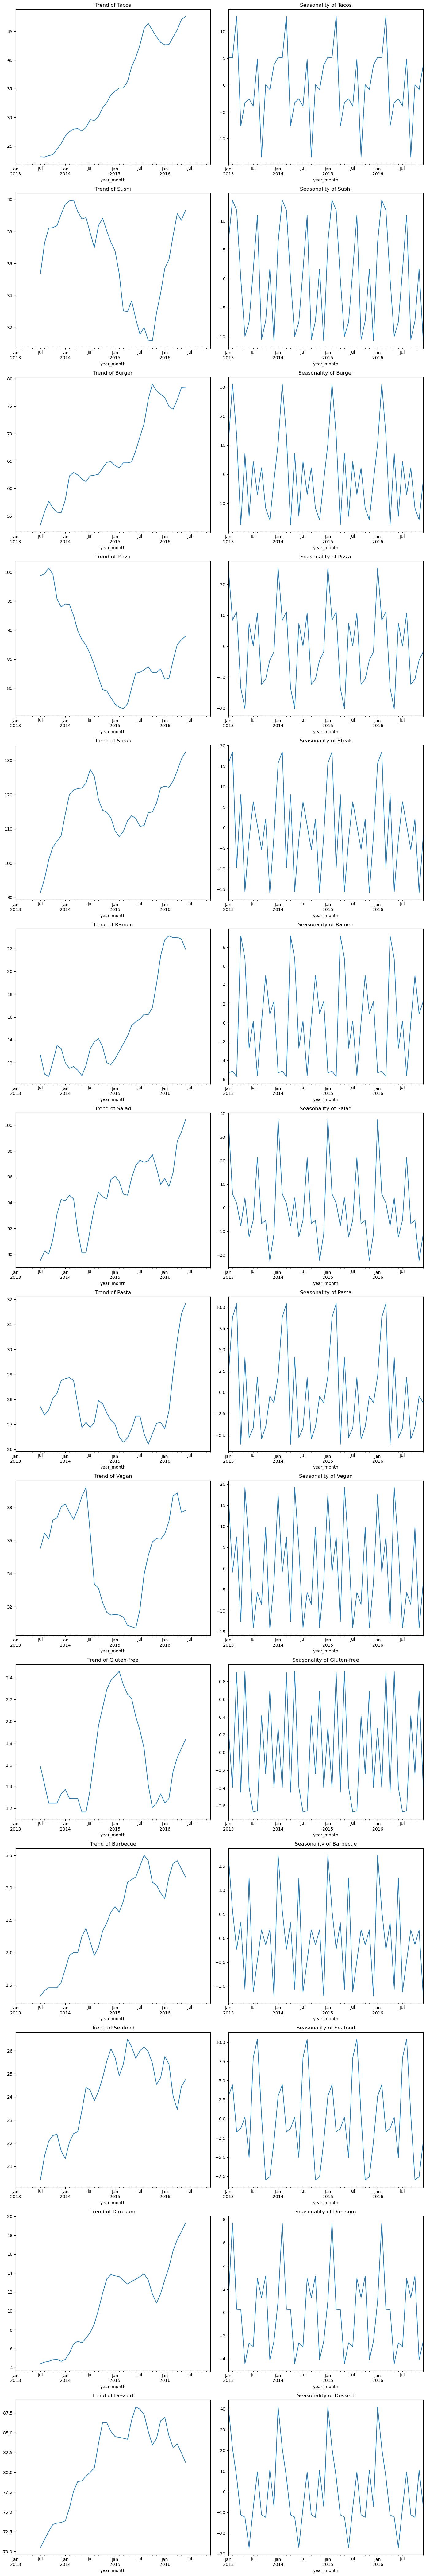

In [9]:
# 選擇要分析的菜餚
dishes_to_analyze = ["tacos", "sushi", "burger", "pizza", "steak", "ramen", "salad", "pasta",
                         "vegan", "gluten-free", "barbecue", "seafood", "dim sum", "dessert"]
plot_seasonality(dish_trends_df, dishes_to_analyze)


In [10]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [20]:
from prophet import Prophet

In [31]:
# 假設 dish_trends_df 是你的原始數據
selected_dish_to_analyze = ["tacos", "sushi", "burger", "pizza", "salad" ]  # 你可以換成 tacos, sushi, burger, ramen 等其他菜餚

10:50:13 - cmdstanpy - INFO - Chain [1] start processing
10:50:14 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:50:14 - cmdstanpy - INFO - Chain [1] start processing
10:50:14 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:50:15 - cmdstanpy - INFO - Chain [1] start processing
10:50:15 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:50:15 - cmdstanpy - INFO - Chain [1] start processing
10:50:16 - cmdstanpy -

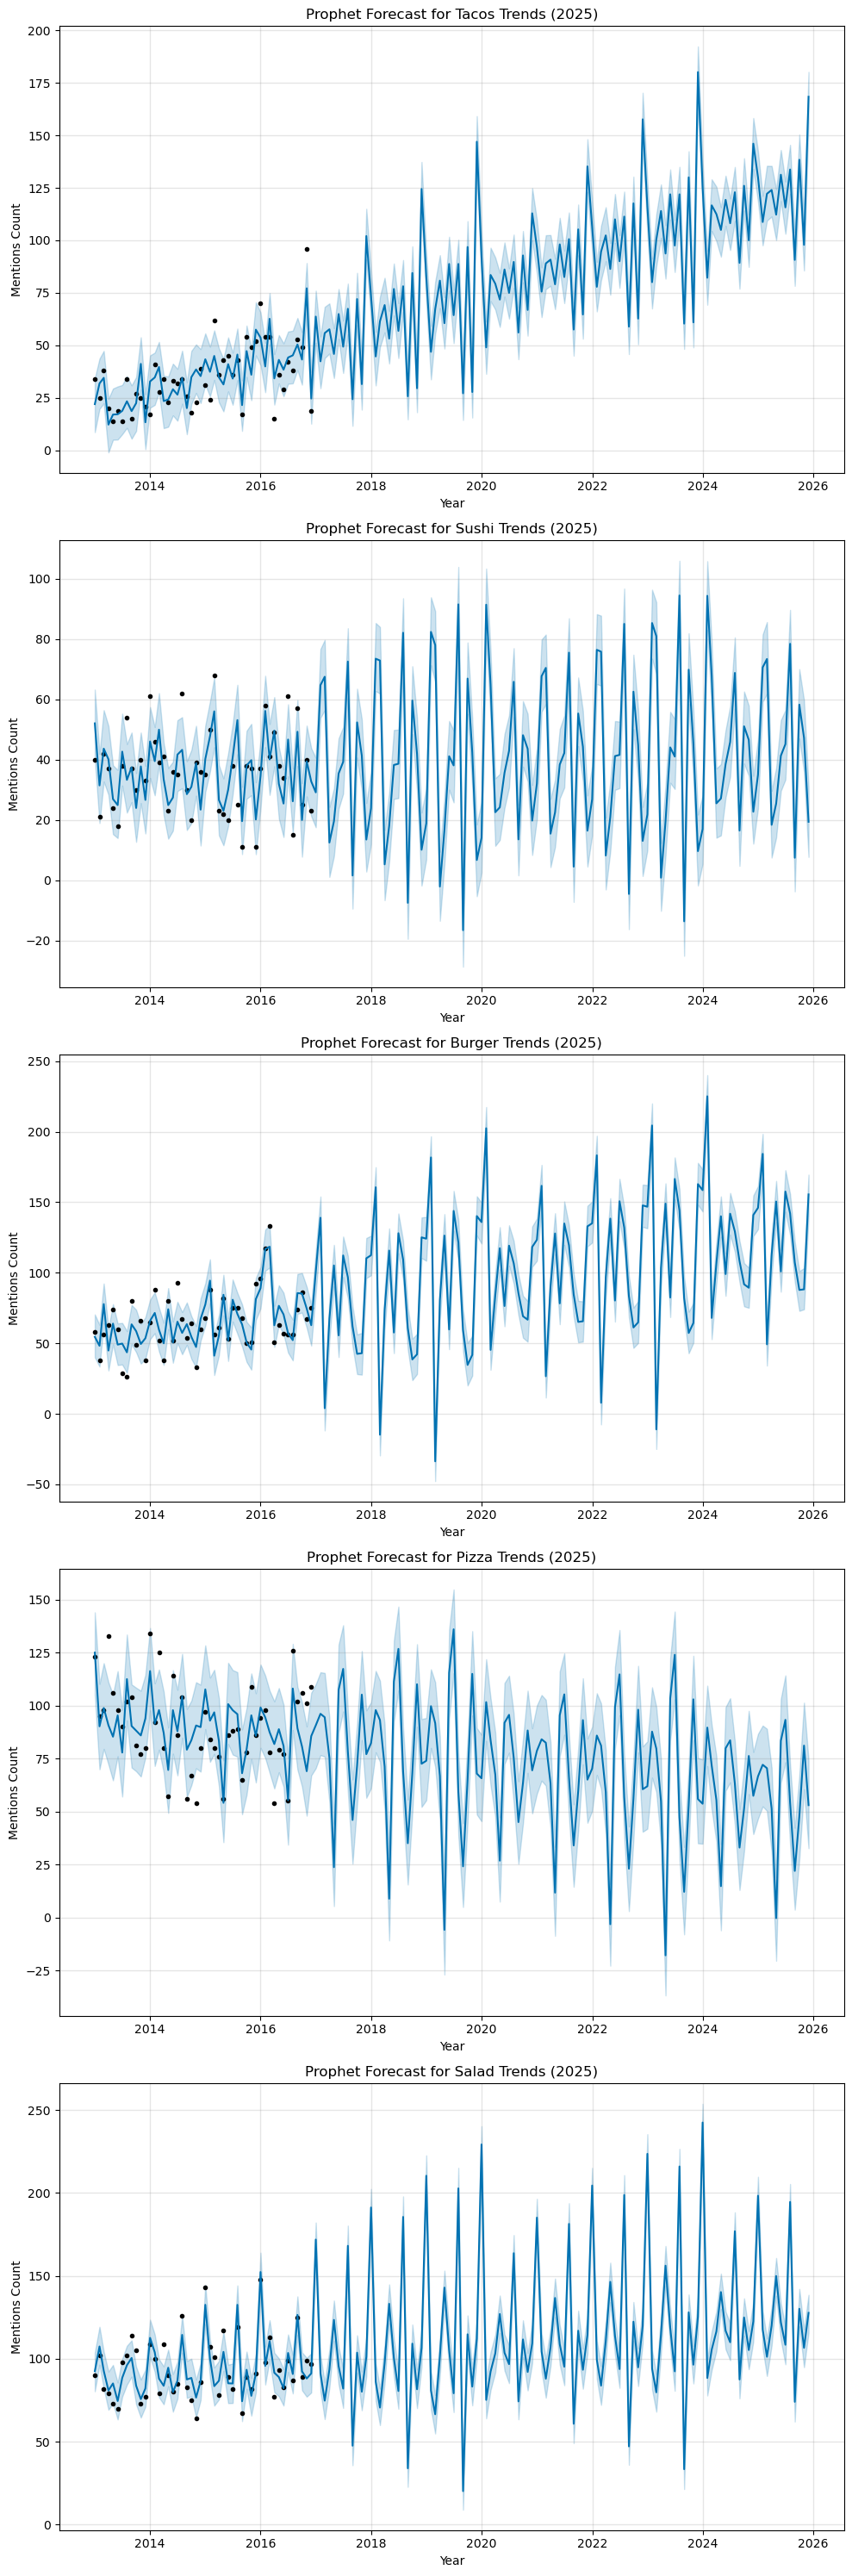

In [32]:
# 設定子圖數量
fig, axes = plt.subplots(len(selected_dish_to_analyze), 1, figsize=(10, 6 * len(selected_dish_to_analyze)))

# 遍歷每個菜餚並預測
for i, selected_dish in enumerate(selected_dish_to_analyze):
    # 取得特定菜餚的時間序列數據
    prophet_df = dish_trends_df[[selected_dish]].reset_index()
    prophet_df["ds"] = prophet_df["year_month"].dt.strftime("%Y-%m-01")  # 設定每月的第一天
    prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])  # 轉換為 datetime
    prophet_df.rename(columns={selected_dish: "y"}, inplace=True)  # Prophet 需要 "y" 為數值

    # 建立 Prophet 模型
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(prophet_df)

    # 產生未來 12 個月的預測 (2025 年)
    future_steps = (2025 - 2016) * 12  # 以月份為單位
    future = model.make_future_dataframe(periods=future_steps, freq="M")
    forecast = model.predict(future)

    # 繪製 Prophet 預測結果
    model.plot(forecast, ax=axes[i])
    axes[i].set_title(f"Prophet Forecast for {selected_dish.capitalize()} Trends (2025)")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Mentions Count")

# 調整佈局，防止圖表重疊
plt.tight_layout()
plt.show()

In [37]:
# 定義要預測的多個食物種類
dishes_to_forecast =["tacos", "sushi", "burger", "pizza", "salad" ]

10:56:42 - cmdstanpy - INFO - Chain [1] start processing
10:56:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:56:43 - cmdstanpy - INFO - Chain [1] start processing
10:56:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:56:44 - cmdstanpy - INFO - Chain [1] start processing
10:56:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
10:56:44 - cmdstanpy - INFO - Chain [1] start processing
10:56:45 - cmdstanpy -

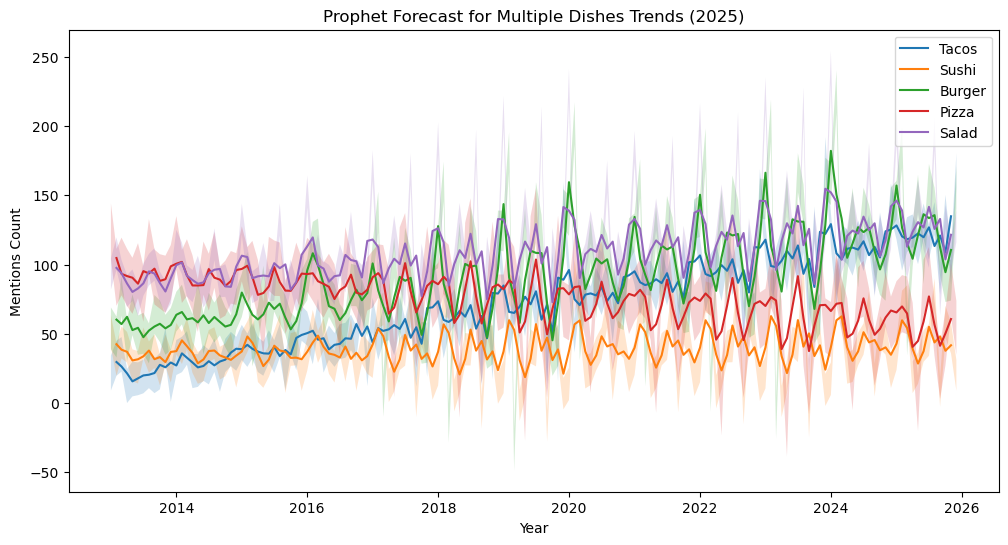

In [38]:
# 設置圖表
plt.figure(figsize=(12, 6))

# 預測並繪圖
for dish in dishes_to_forecast:
    # 準備數據
    prophet_df = dish_trends_df[dish].reset_index()
    prophet_df["ds"] = prophet_df["year_month"].dt.strftime("%Y-%m-01")  # 設定每月的第一天
    prophet_df["ds"] = pd.to_datetime(prophet_df["ds"])  # 轉換為日期格式
    prophet_df.rename(columns={dish: "y"}, inplace=True)  # Prophet 需要 "y" 作為數值

    # 建立 Prophet 模型
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(prophet_df[["ds", "y"]])

    # 生成未來的預測數據點（到 2025 年）
    future_steps = (2025 - 2016) * 12  # 預測未來 9 年（月度資料）
    future = model.make_future_dataframe(periods=future_steps, freq="M")
    forecast = model.predict(future)
    
    # 平滑處理
    forecast["yhat_smoothed"] = forecast["yhat"].rolling(window=3, center=True).mean()

    # 繪製預測結果
    plt.plot(forecast["ds"], forecast["yhat_smoothed"], label=f"{dish.capitalize()}")
    
    # 添加置信區間
    plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2)

# 設定圖表格式
plt.title("Prophet Forecast for Multiple Dishes Trends (2025)")
plt.xlabel("Year")
plt.ylabel("Mentions Count")
plt.legend()
plt.show()


